# <a href="https://thetahat.ru/courses/ph-ds-2025-spr">Phystech@DataScience</a>

# Логистическая регрессия

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set_theme(style='dark', font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

## Физика : [датасет](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) на предсказание пульсаров

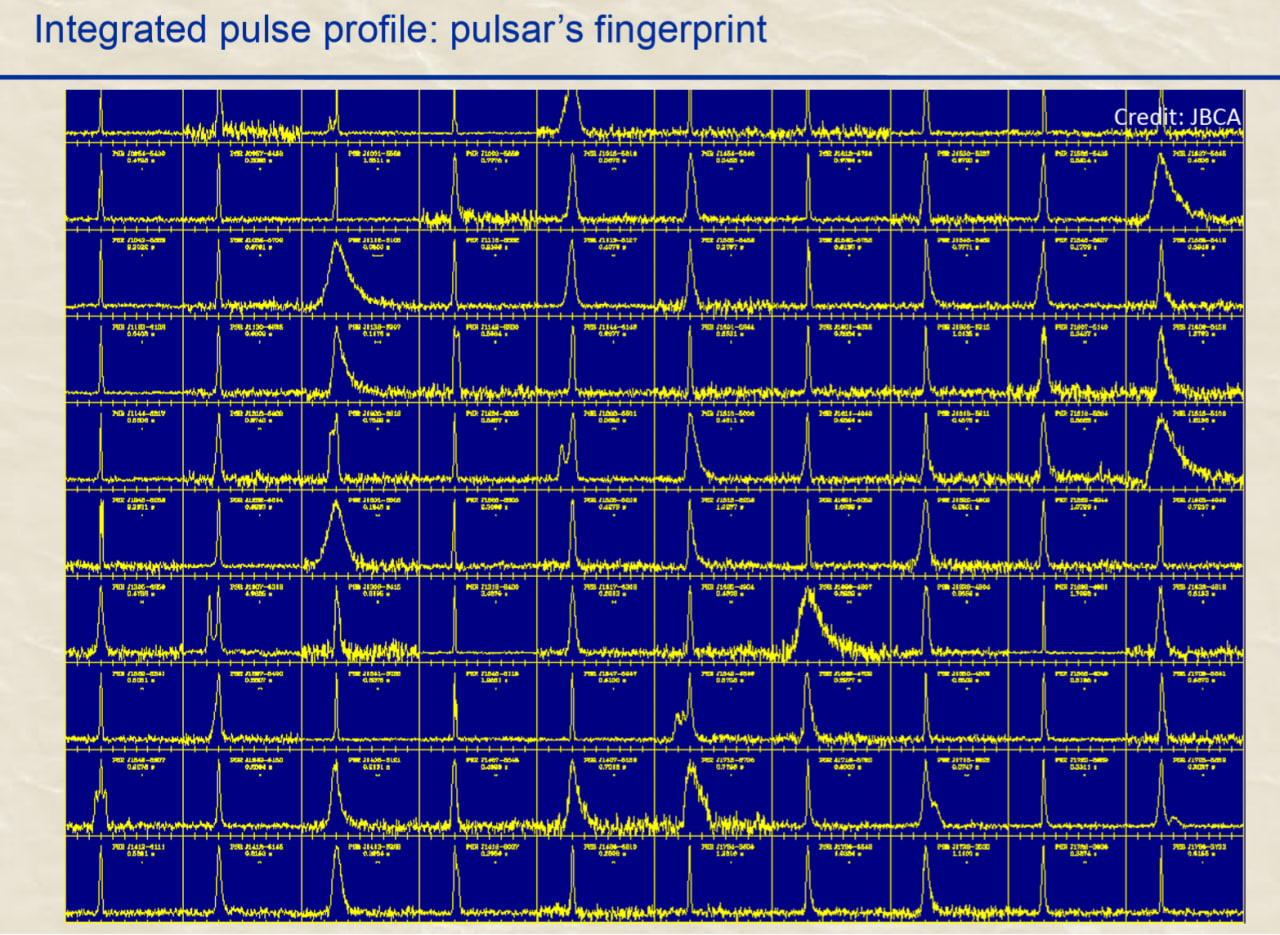

Пульсары - это космические объекты, излучающие в различных диапазонах длины волны. Согласно современным астрофизическим теориям, пульсары представляют собой вращающиеся нейтронные звезды, обладающие магнитным полем, наклоненным относительно оси вращения.

В используемом датасете есть как примеры ложных обнаружений, так и примеры реальных пульсаров, подтвержденные учеными. Данные получены в результате [The High Time Resolution Universe Pulsar Survey I](https://arxiv.org/abs/1006.5744).

<h1>Описание датасета</h1>
Сигнал от пульсаров представляет собой периодические импульсы.

Для описания объекта используется integrated profile (интегральный профиль) &mdash; агрегирование сигнала за разные периоды вращения (см. картинку выше). У всех пульсаров разные интегральные профили, и обычно эта характеристика мало меняется во времени.
В данном датасете интегральный профиль также усреднен по частоте.

Полный набор признаков датасета:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

Целевая переменная:
9. Target class


В признаках встречается еще одна важная характеристика объекта: DM-SNR кривая. Подробнее о ней можно почитать <a target="_blank" href="https://arxiv.org/pdf/1005.5068.pdf#:~:text=period-DM%20diagram%3B%20good%20agreement,pulsars%20in%20their%20candidate%20plots.)">в специализированных материалах</a>.

Про коэффициенты эксцесса и асимметрии можно посмотреть <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0">здесь</a> и <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8">здесь</a>, формулы для выборочных коэффициентов асимметрии и эксцесса можно найти в английской версии этих статей.

<a target="_blank" href="https://arxiv.org/pdf/1603.05166.pdf">Статья</a> с подробным описанием процесса генерации данных.











## Биология: [датасет](https://www.kaggle.com/datasets/medelbachirkhellaf/anemia-easylevel) на  анемию и лабораторные тесты

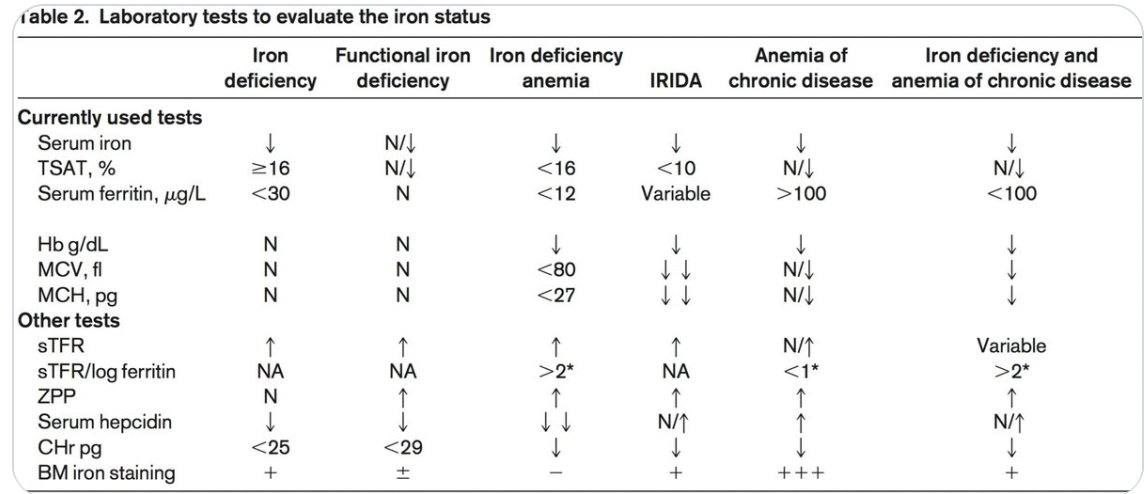  

Анемия — это состояние, при котором уровень гемоглобина в крови ниже нормы. Гемоглобин — это белок в эритроцитах, который переносит кислород из лёгких в ткани и органы. Анемия может быть вызвана различными причинами, включая дефицит железа, хронические заболевания, кровопотери или нарушения синтеза гемоглобина.

На изображении представлены лабораторные тесты, которые используются для оценки состояния железа и диагностики анемии. Вот краткое объяснение ключевых показателей:

### Ключевые показатели:

- **Serum iron (Сывороточное железо)**:
  - Низкий уровень указывает на дефицит железа.
  - Нормальные значения: Мужчины: 60–170 мкг/дл, Женщины: 50–170 мкг/дл.

- **TSAT (Transferrin Saturation, %)**:
  - Показывает, насколько насыщен трансферрин железом.
  - Низкий уровень (<16%) указывает на дефицит железа.

- **Serum ferritin (Сывороточный ферритин)**:
  - Показывает запасы железа в организме.
  - Низкий уровень (<30 мкг/л) указывает на дефицит железа.

### Примеры использования в таблице:

| Показатель                  | Описание                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| **Сывороточное железо (Serum iron)** | ↓ — снижено при железодефиците и железодефицитной анемии.              |
|                             | N↓↓ — может быть нормальным или значительно сниженным при функциональном дефиците железа. |
| **Ферритин (Serum ferritin)**       | <30 — снижен при железодефиците.                                        |
|                             | >100 — повышен при анемии хронических заболеваний.                    |
| **Гемоглобин (Hb)**         | ↓ — снижен при анемии.                                                  |
|                             | N — нормальный уровень, если анемия отсутствует.                        |
| **MCV (Mean Corpuscular Volume)**   | <80 — снижен (микроцитоз) при железодефицитной анемии.                 |
|                             | N — нормальный при отсутствии анемии.                                   |  


Подробнее с типами и их особенностями можно ознакомиться [тут](https://ashpublications.org/hematology/article/2015/1/8/20735/Iron-deficiency-new-insights-into-diagnosis-and)


<!DOCTYPE html>
<body>
    <h1>Описание датасета</h1>
    <p><p>
    <p>1. <strong>Hemoglobin</strong>: это белок в красных кровяных тельцах (эритроцитах), который отвечает за перенос кислорода из лёгких в ткани и органы, а также за возврат углекислого газа обратно в лёгкие.</p>
    <p>Нормальные значения:</p>
    <ul>
        <li>Мужчины: 13.8&mdash;17.2 г/дл</li>
        <li>Женщины: 12.1&mdash;15.1 г/дл</li>
    </ul>
    <p>2. <strong>MCH (Mean Corpuscular Hemoglobin)</strong>: показывает среднее количество гемоглобина в одном эритроците.</p>
    <p>3. <strong>MCHC (Mean Corpuscular Hemoglobin Concentration)</strong>: показывает среднюю концентрацию гемоглобина в единице объёма эритроцитов.</p>
    <p>4. <strong>MCV (Mean Corpuscular Volume)</strong>: показывает средний объём одного эритроцита.</p>
    <p>5. <strong>GENDER (Пол)</strong>: указывает пол пациента (мужской или женский). В данном датасете пол уже закодирован как 0 и 1.</p>
    <p>6. <strong>IDENTIFICATION (Идентификация)</strong>: уникальный идентификатор пациента, который указывает на наличие/отсутствие заболевания.</p>
    <p>Как можно заметить наши данные используются в классификации и выявлении различных типов анемии из реальной жизни.</p>
</body>
</html>


## 1. Загрузка датасета

Мы будем работать только с файлом `Test_Anemia.csv` или `pulsar_data_train.csv`.  

<details>
  <summary>Если загрузили .zip файл в среду</summary>
  Воспользуйтесь приведенной ниже командой, она достанет нужный файл в среду `/content/`

  !unzip `/content/archive.zip`
</details>

In [22]:
data = pd.read_csv("pulsar_data_train.csv")
data_test = pd.read_csv("pulsar_data_test.csv")

Посмотрим на вид датасета и на типы данных, содержащихся в нем

In [23]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Выведите описательные статистики для каждого из классов и сделайте предварительный вывод о том, какие признаки лучше всего разделяют классы

In [25]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [26]:
data_test.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,5370.000000,5370.000000,4603.000000,5370.000000,5370.000000,4846.000000,5370.000000,5126.000000,0.0
mean,111.168917,46.615074,0.483676,1.751260,12.473587,26.425371,8.233724,102.869088,NaN
std,25.608635,6.940638,1.076893,6.072820,29.145134,19.384489,4.435683,104.748418,NaN
min,6.179688,24.791612,-1.876011,-1.764717,0.213211,7.370432,-2.721857,-1.964998,NaN
25%,101.041016,42.408020,0.030643,-0.189557,1.956522,14.555826,5.700461,33.817330,NaN
50%,114.757812,47.031304,0.227314,0.186468,2.830686,18.549670,8.383695,81.392046,NaN
75%,127.023438,51.133444,0.475056,0.918807,5.590301,28.681787,10.632265,136.893502,NaN
max,192.617188,98.778911,7.608370,65.385974,223.392141,109.712649,34.539844,1191.000837,NaN


**Ответ:**

## 2. Предобработка данных

Есть ли в полученом датасете пропуски исходя из информации в `data.info()`?  
 Более явную проверку на пропуски можно сделать при помощи следующего метода

In [27]:
data.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

Удалите все строчки с пропусками (если такие есть):

In [29]:
data.dropna()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
...,...,...,...,...,...,...,...,...,...
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146,0.0
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


Чтобы удобнее было работать с данными переведем все названия признаков в нижний регистр  

<details>
  <summary>Подсказка</summary>
  Можно воспользоваться методом `.lower()`
</details>

In [31]:
data.columns = data.columns.str.lower()

Разбейте наши данные на `features` $(X)$ &mdash; данные для обучения, и `target` $(Y)$ &mdash;предсказываемая переменная

Профиль биологии может использовать все столбцы, профиль физики - только те что указаны ниже:

In [36]:
needed_columns = [' mean of the integrated profile',
       ' standard deviation of the integrated profile',
       ' skewness of the integrated profile', ' mean of the dm-snr curve',
       ' excess kurtosis of the dm-snr curve']  # Используем только эти столбцы для пульсаров

Определите целевой столбец, для дальнешего удобного использования:

In [43]:
target = 'target_class'

In [39]:
X = data[needed_columns]
y = target

## 3. Графики

Проведем визуальный анализ данных. Построим оценки плотности по каждому признаку отдельно для каждого класса.  
1. Какие признаки лучше всего разделяют классы?  
2. Как это отразится на результатах модели?


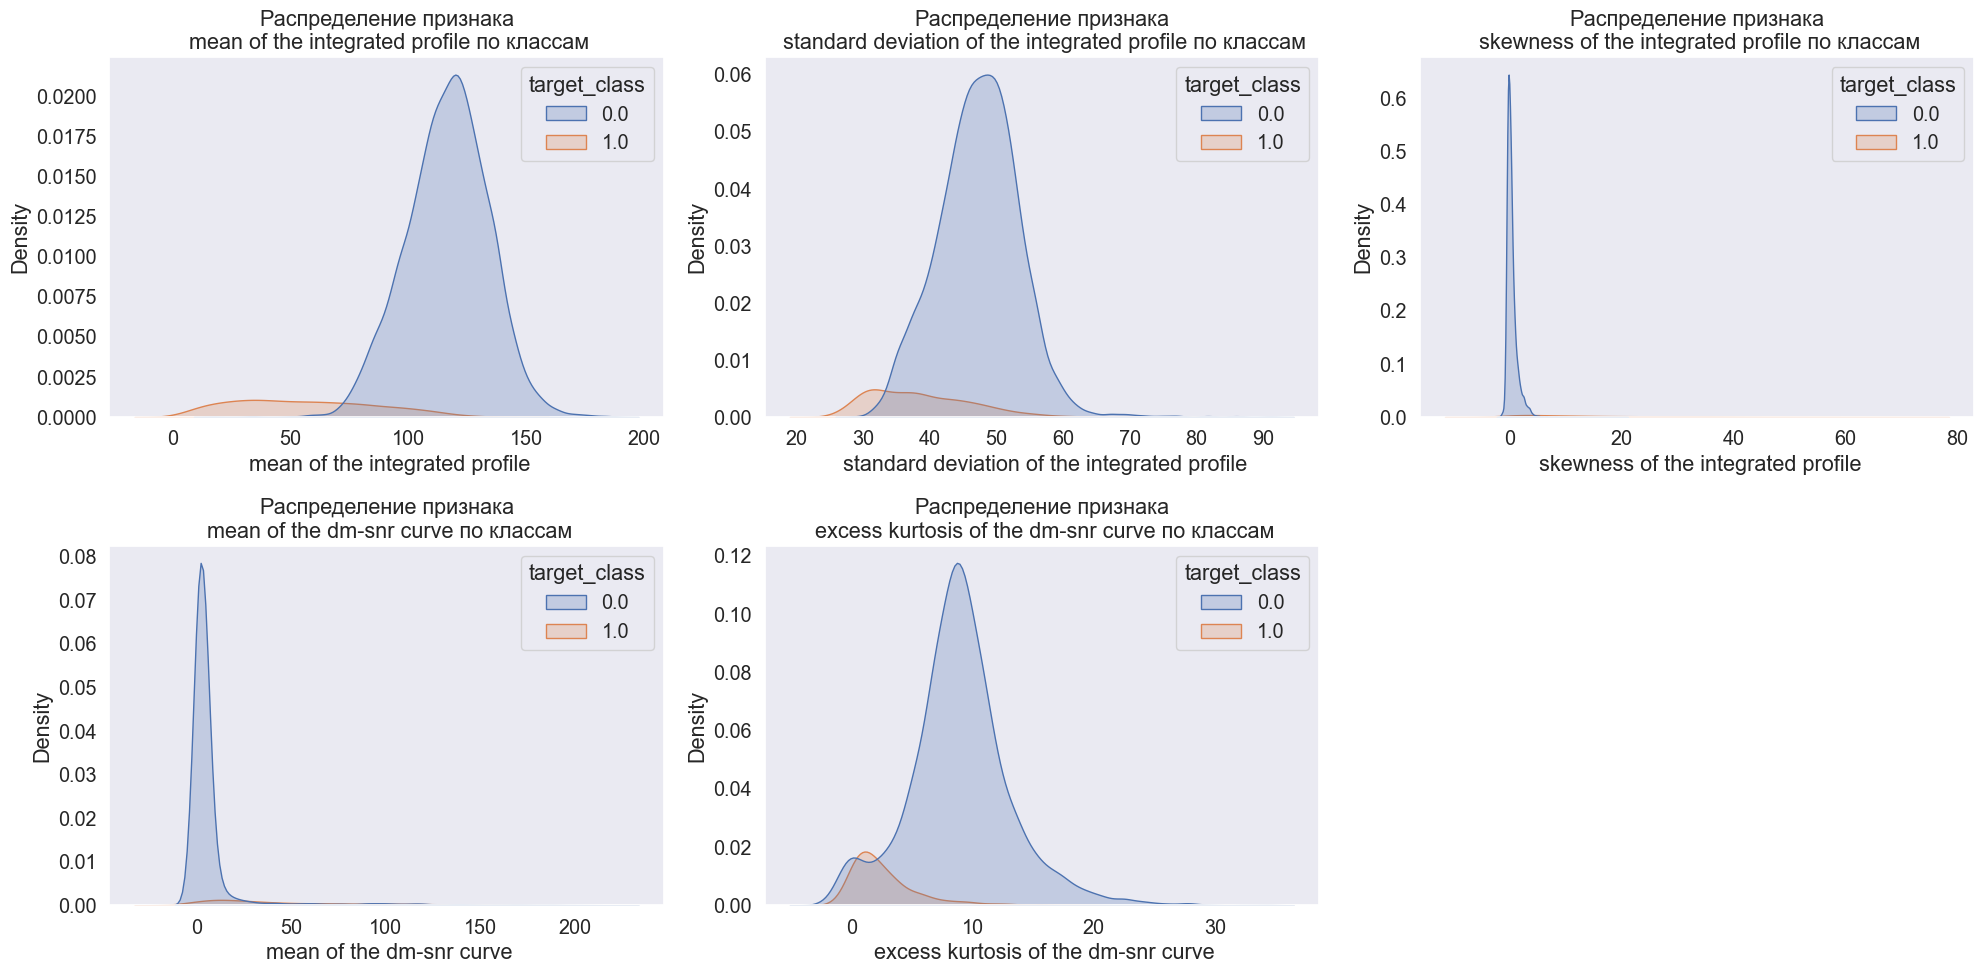

In [40]:
# Определим количество признаков
num_features = len(X.columns)

# Определим количество строк и столбцов для subplot
num_cols = 3  # Количество столбцов
num_rows = (num_features + num_cols - 1) // num_cols  # Количество строк

# Создаем фигуру и сетку подграфиков
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Плоский список осей для удобства итерации
axes = axes.flatten()

# Построение графиков плотности для каждого признака
for i, feature in enumerate(X.columns):
    sns.kdeplot(data=data, x=feature, hue=target, fill=True, ax=axes[i])
    axes[i].set_title(f'Распределение признака\n{feature} по классам')

# Удаляем лишние оси, если их больше, чем признаков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Показываем графики
plt.tight_layout()
plt.show()

**Ответ:**

### Биология

Поскольку для признака gender распределение выглядит не очень информативно, визуализируем его с помощью `barplot`

In [ ]:
# Визуализация распределения признака 'gender' с помощью barplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue=target)

# Добавляем заголовок и метки осей
plt.title('Распределение признака gender по классам')
plt.xlabel('Gender')
plt.ylabel('Count')

# Показываем график
plt.show()

Что можно сказать о распределении для признака `GENDER`?

**Ответ:**

### Физика

Поскольку для признака ` skewness of the integrated profile` распределение выглядит не очень информативно, визуализируем его более подробно с гистограммой и нанесением средних

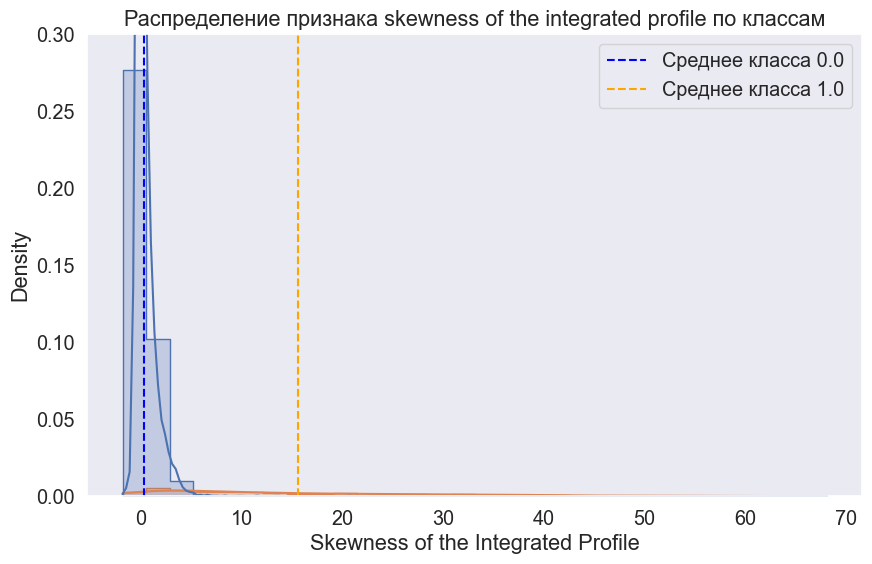

In [47]:
# Заполняем пропуски в вашем коде
plt.figure(figsize=(10, 6))

# Гистограмма для каждого класса
sns.histplot(data=data, x=' skewness of the integrated profile', hue=target, kde=True, bins=30, element='step', stat='density')

# Добавляем вертикальные линии для среднего значения каждого класса
for target_class in data[target].unique():
    mean_value = data[data[target] == target_class][' skewness of the integrated profile'].mean()
    plt.axvline(mean_value, color='orange' if target_class == 1 else 'blue', linestyle='--', label=f'Среднее класса {target_class}')

# Добавляем заголовок и метки осей
plt.title('Распределение признака skewness of the integrated profile по классам')
plt.xlabel('Skewness of the Integrated Profile')
plt.ylabel('Density')

# Отрегулируйте масштаб для лучшей визуализации класса 1
plt.ylim(0, 0.3)

# Показываем график
plt.legend()
plt.show()


Что можно сказать о распределении для признака `skewness of the integrated profile`?

**Ответ:**

## 4. Разделим датасет и обучим модель

Создайте и обучите логистическую регрессию. Укажите `fit_intercept` &mdash; `True` и `penalty` &mdash; `None`.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
model = LogisticRegression(fit_intercept=True, penalty=None)
model.fit(X, y)

LogisticRegression(penalty=None)

Напечатайте коэффициенты модели. О чём говорят знаки `+` и `-`?

In [54]:
coefficients = model.coef_
intercept = model.intercept_

feature_names = X.columns  # Замените на ваши названия признаков
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=['weights'])

# Добавляем свободный член в DataFrame
coef_df.loc['intercept'] = intercept

print(coef_df)

                                                weights
 mean of the integrated profile               -0.053635
 standard deviation of the integrated profile  0.086175
 skewness of the integrated profile            0.584519
 mean of the dm-snr curve                     -0.013710
 excess kurtosis of the dm-snr curve          -0.305824
intercept                                      0.018745


**Выводы:**

## 5. Проверим качество модели

Для  объектов из тестовой выборки оцените вероятность наличия анемии, при помощи метода [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Выведите эти значения, а также итоговые предсказания модели методом `predict`

In [ ]:
y_pred = model.predict(data_test)
probabilities = <...>
# Выводим вероятности и предсказания
results_df = pd.DataFrame({
    'Object': range(1, len(X_test) + 1),
    'Probability_Class_0': <...>,
    'Probability_Class_1': <...>,
    'Prediction': <...>
})

# Выводим DataFrame
results_df.head()

Теперь проверим качество нашей модели. Посчитайте его на тестовой выборке при помощи метрики Accuracy, показывающей долю правильных предсказаний:
$$
      Accuracy(Y, \widehat{Y}) = \frac{1}{n}\sum^{n}_{i = 1} I\{\widehat{Y}_{i} = Y_i\}
$$

In [ ]:
<...>

**Выводы:**